# Iris Dataset

## 1. Load Data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["species"] = iris.target  # will not be used for clustering
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


## 2. Scaling

In [63]:
# Features
X = df.drop("species", axis=1)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3. Exploratory Data Analysis

In [64]:
# Basic statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [66]:
import plotly.express as px

fig = px.bar(X, y='sepal length (cm)', title='sepal length (cm) distribution')

fig.show()

In [67]:
fig = px.bar(X, y='sepal width (cm)', title='sepal width (cm) distribution')

fig.show()

In [68]:
fig = px.bar(X, y='petal length (cm)', title='petal length (cm) distribution')

fig.show()

In [69]:
fig = px.bar(X, y='petal width (cm)', title='petal width (cm) distribution')

fig.show()

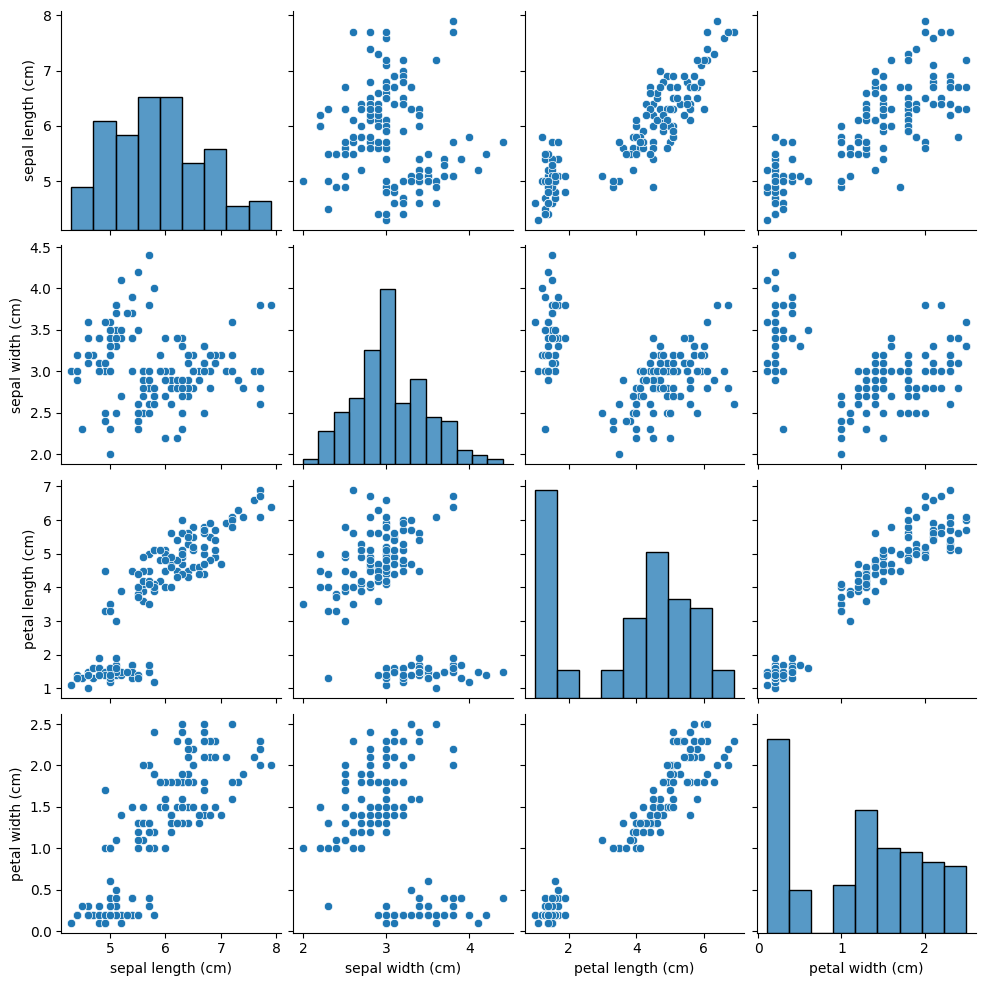

In [70]:
# Pairplot
sns.pairplot(X, corner=False, diag_kind='hist')
plt.show()

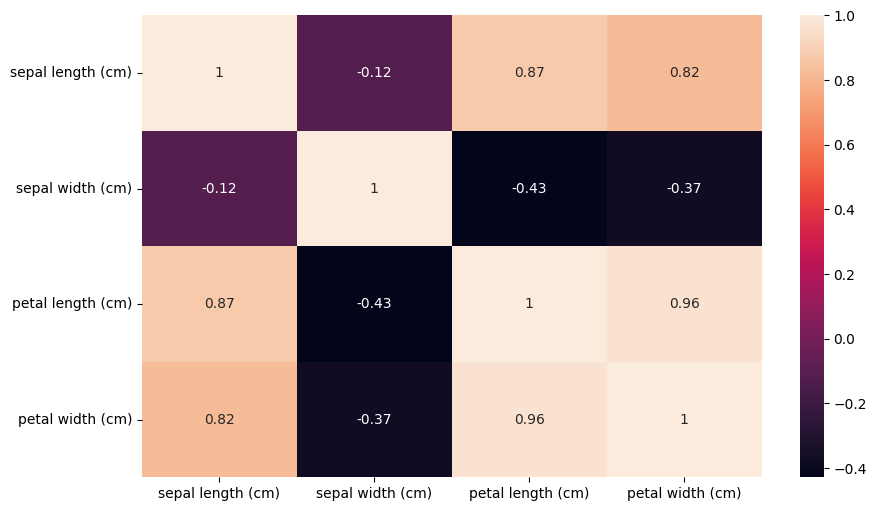

In [71]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=True)
plt.show()

## 4. Clustering Algorithms

### K-Means

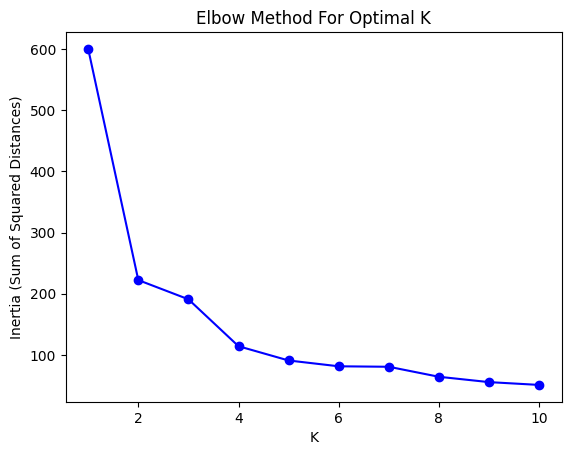

In [72]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('K')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal K')
plt.show()

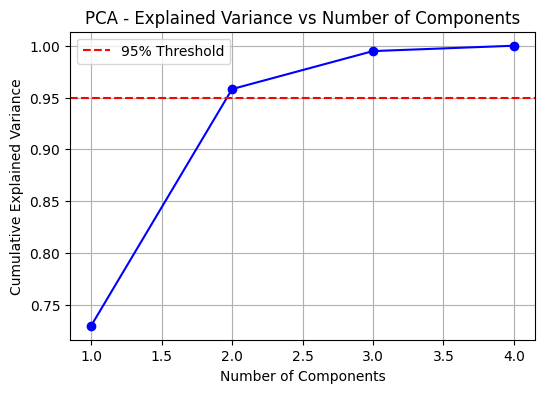


Individual explained variance ratios: [0.72962445 0.22850762 0.03668922 0.00517871]

Cumulative explained variance: [0.72962445 0.95813207 0.99482129 1.        ]


In [73]:
# PCA
from sklearn.decomposition import PCA

# Fit PCA without limiting components
pca = PCA().fit(X_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Threshold")
plt.legend()
plt.show()

# Print variance ratios
print("\nIndividual explained variance ratios:", pca.explained_variance_ratio_)
print("\nCumulative explained variance:", cumulative_variance)

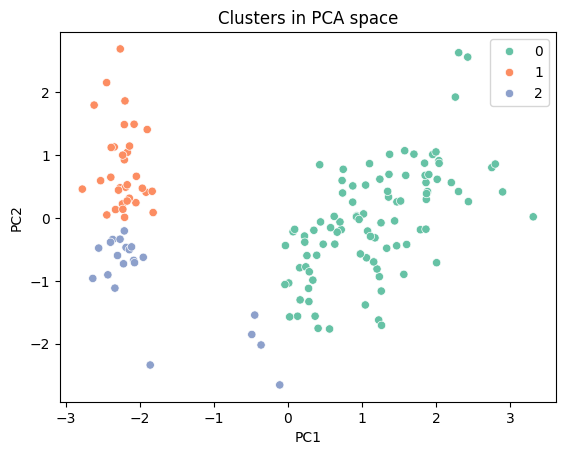

In [74]:
# Clustering in PCA space
pca = PCA(n_components=2)     # Components=2
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=3, random_state=42)        # K=3
clusters_pca = kmeans_pca.fit_predict(X_pca)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_pca, palette='Set2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters in PCA space')
plt.show()

### Hierarchical Clustering

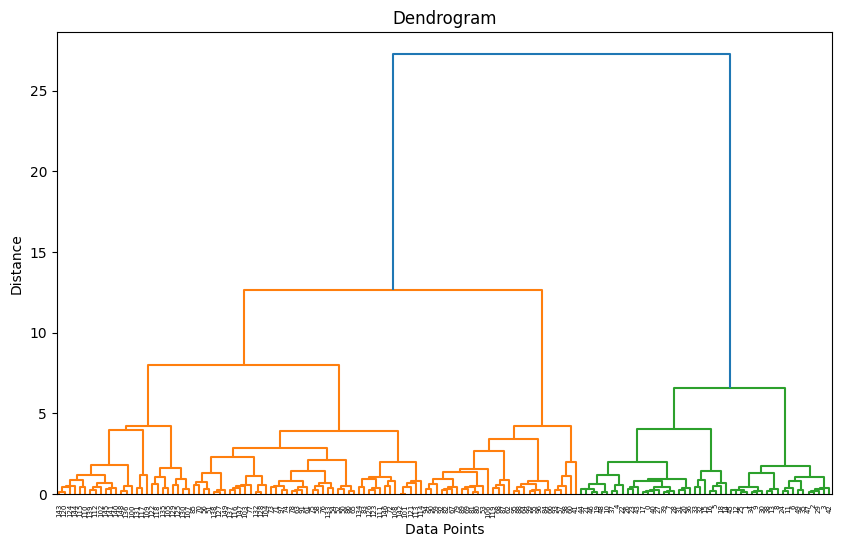

In [75]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(X_scaled,method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

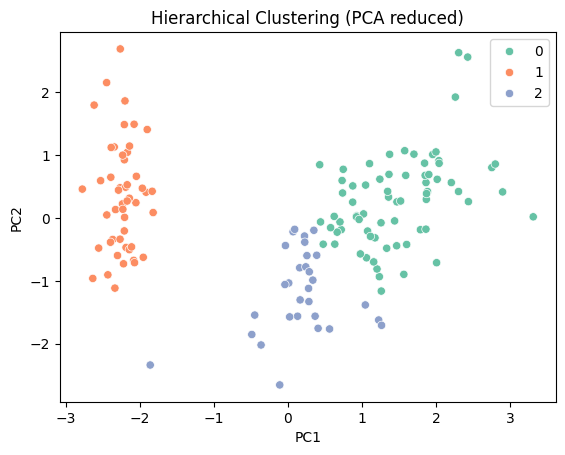

In [76]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")         # clusters = 3
labels_hc = hc.fit_predict(X_scaled)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_hc, palette='Set2')
plt.title("Hierarchical Clustering (PCA reduced)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### DBSCAN

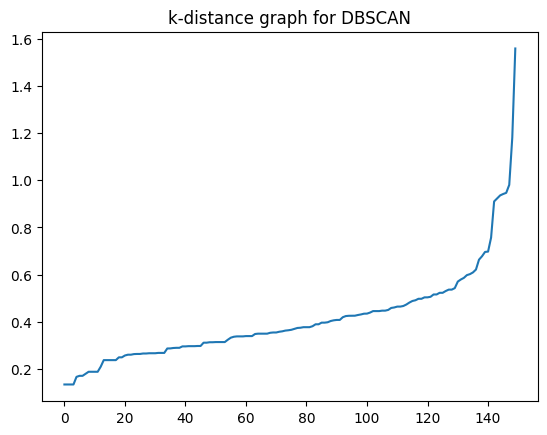

In [77]:
# k-distance graph to find eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:,2])
plt.plot(distances)
plt.title("k-distance graph for DBSCAN")
plt.show()

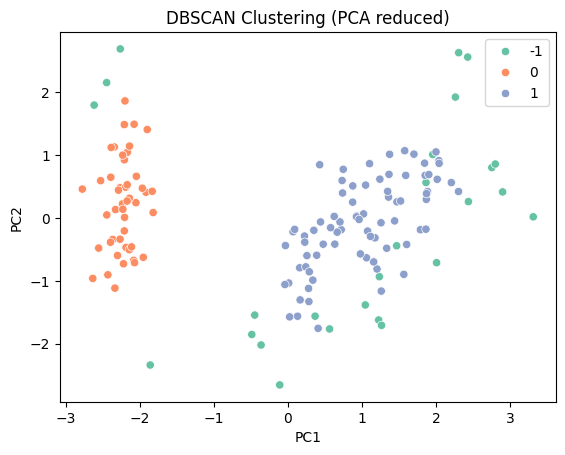

In [78]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_dbscan, palette='Set2')
plt.title("DBSCAN Clustering (PCA reduced)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 5. Evaluation

In [79]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix
summary = pd.DataFrame({
    "Algorithm": ["K-Means", "Hierarchical", "DBSCAN"],
    "ARI Score": [
        adjusted_rand_score(df["species"], clusters_pca),
        adjusted_rand_score(df["species"], labels_hc),
        adjusted_rand_score(df["species"], labels_dbscan)
    ],
    "Clusters": [
        len(np.unique(clusters_pca)),
        len(np.unique(labels_hc)),
        len(np.unique(labels_dbscan))
    ]
})

print("Clustering Performance Evaluation:\n")
print(summary)

Clustering Performance Evaluation:

      Algorithm  ARI Score  Clusters
0       K-Means   0.432805         3
1  Hierarchical   0.615323         3
2        DBSCAN   0.470627         3
